<a href="https://colab.research.google.com/github/Diacod-I/congenial/blob/main/BreastCancerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [346]:
import matplotlib.patches as mpatches
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [347]:
data=load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [348]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [349]:
data.feature_names.shape

(30,)

In [350]:
data.data.shape

(569, 30)

In [ ]:
mean_radio = data.data[:,1]
mean_radio

In [ ]:
print(data.target_names,'\n')
print(data.target.shape,'\n')
data.target

Exception Occurred.
This particular cell has a error where it starts percieving "data.data" as tuples upon runnning once.
Try re-running the cells prior to this one to view the Scatter Plot


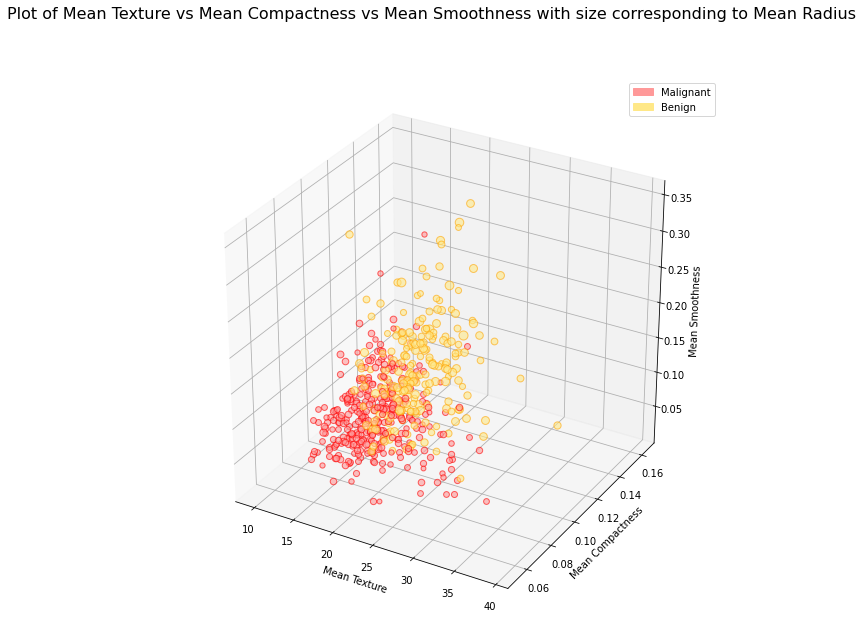

In [365]:
try:
  fig = plt.figure.Figure(figsize=(10,10))
  ax = fig.add_subplot(111,projection='3d')
  fill_colors = ['#FF9999' if wt==1 else '#FFE888' for wt in list(data.target)]
  edge_colors = ['red' if wt==1 else 'orange' for wt in list(data.target)]
  x3 = list(data.data[:,1])
  y3 = list(data.data[:,4])
  z3 = list(data.data[:,5])
  sizze=list(data.data[:,0])
  t=fig.suptitle("Plot of Mean Texture vs Mean Compactness vs Mean Smoothness with size corresponding to Mean Radius",fontsize=16)
  data_points = [(x,y,z) for x,y,z in zip(x3,y3,z3)]
  for data, size,hue,edge in zip(data_points,sizze,fill_colors,edge_colors):
    x,y,z=data
    ax.scatter3D(x,y,z,alpha=0.6,s=size*3,c=hue,edgecolors=edge)
  ax.set_xlabel("Mean Texture")
  ax.set_ylabel("Mean Compactness")
  ax.set_zlabel("Mean Smoothness")
  malig = mpatches.Patch(color="#FF9999",label="Malignant")
  benig = mpatches.Patch(color='#FFE888',label="Benign")
  ax.legend(handles = [malig,benig],loc='best')
except AttributeError:
  print("Exception Occurred.\nThis particular cell has a error where it starts percieving \"data.data\" as tuples upon runnning once.\nTry re-running the cells prior to this one to view the Scatter Plot")
fig

In [354]:
xtrain,xtest,ytrain,ytest = train_test_split(data.data,data.target, test_size=0.3)

In [355]:
values,features = xtrain.shape
values,features

(398, 30)

In [356]:
scaler=StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [ ]:
xtrain[:,1]

In [ ]:
xtest[:,1]

In [359]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(features,)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [360]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics='accuracy')

In [361]:
bler = model.fit(xtrain,ytrain,epochs=100,validation_data=(xtest,ytest))

Epoch 1/100
13/13 [==============================] - 1s 15ms/step - loss: 0.7871 - accuracy: 0.5377 - val_loss: 0.7216 - val_accuracy: 0.5614
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.7152 - accuracy: 0.5930 - val_loss: 0.6497 - val_accuracy: 0.6316
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6537 - accuracy: 0.6332 - val_loss: 0.5878 - val_accuracy: 0.6667
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5989 - accuracy: 0.6784 - val_loss: 0.5363 - val_accuracy: 0.7135
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5529 - accuracy: 0.7186 - val_loss: 0.4927 - val_accuracy: 0.7661
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5136 - accuracy: 0.7412 - val_loss: 0.4537 - val_accuracy: 0.8012
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4782 - accuracy: 0.7663 - val_loss: 0.4216 - val_accuracy: 0.8304
Epoch 8/100


In [362]:
print("Training Score:",model.evaluate(xtrain,ytrain))
print("Test Score:",model.evaluate(xtest,ytest))

13/13 [==============================] - 0s 1ms/step - loss: 0.0961 - accuracy: 0.9774
Training Score: [0.09606912732124329, 0.9773869514465332]
6/6 [==============================] - 0s 2ms/step - loss: 0.1078 - accuracy: 0.9708
Test Score: [0.10784853994846344, 0.9707602262496948]


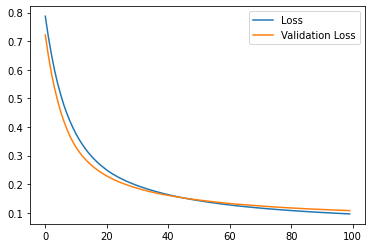

In [363]:
plt.plot(bler.history['loss'],label='Loss')
plt.plot(bler.history['val_loss'],label='Validation Loss')
plt.legend()

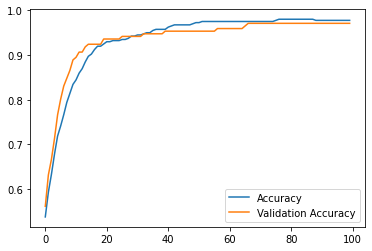

In [364]:
plt.plot(bler.history['accuracy'],label='Accuracy')
plt.plot(bler.history['val_accuracy'],label='Validation Accuracy')
plt.legend()